In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.show()
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'verdana'
sns.set_style('ticks')  # Changed from 'white' to 'ticks'
sns.set_context('paper', font_scale=1.1)

ttt_colors = ['#F85288', '#1FFF00']
palette = sns.color_palette("viridis_r", n_colors=20)
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', palette)

# # Display the gradient
# gradient = np.linspace(0, 1, 256)
# gradient = np.vstack((gradient, gradient))
# plt.figure(figsize=(8, 1))
# plt.imshow(gradient, aspect='auto', cmap=custom_cmap)
# plt.axis('off')
# plt.show()

## Load data

In [3]:
df = pd.read_csv('/scratch/project/open-35-8/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/proteinttt_results.tsv', sep='\t')
# df = df.drop(columns=['chain', 'chain_type', 'resolution'])
print(len(df))
df = df.dropna()
df['pLDDT_improvement'] = df['pLDDT_after'] - df['pLDDT_before']
df['tm_score_improvement'] = df['tm_score_after'] - df['tm_score_before']
df['lddt_improvement'] = df['lddt_after'] - df['lddt_before']
print(len(df))
df

317882
317882


,id,nmsa,pLDDT_AlphaFold,version,sequence,length,pLDDT_before,pLDDT_after,tm_score_before,lddt_before,tm_score_after,lddt_after,time,difference_plddt,pLDDT_improvement,tm_score_improvement,lddt_improvement
0,A7IUX3,3,40.184184,BASE,MYKMSLLVLTQEFQEEDMPWFGTAFLHPHVPNRGPCPSFHLDNPKN...,103,28.709551,36.696726,0.28594,0.331706,0.33734,0.350680,36.788191,7.987175,7.987175,0.05140,0.018974
1,A0A6M9TZY3,7,40.185052,BASE+LOGAN+12CY,MLLDKPDQHVITEFDAFMENDKIILNGIFNDTAKKALNLSLPLGFF...,335,42.312089,58.246706,0.43240,0.533388,0.39168,0.544333,185.468657,15.934617,15.934617,-0.04072,0.010944
2,A0A192GNL3,47,40.185311,BASE,MLPQNSQVVHGVQDGPPVGPQPAQALLKVPVDVRRQAQAGPLAGVK...,379,26.668830,28.764074,0.12965,0.622505,0.21060,0.608376,228.917387,2.095244,2.095244,0.08095,-0.014130
3,A0A8A1UFW7,10,40.185707,BASE+LOGAN,MIYVYAEEERWLSNSDCIHVHRTVFFASGLYRIPYYTSSFVSVGSF...,89,30.481073,33.632799,0.36591,0.614272,0.38138,0.575195,37.040655,3.151726,3.151726,0.01547,-0.039077
4,A0A1V0SAK4,5,40.186713,BASE+LOGAN+12CY,MLYNNKELVIETFGGSHRSGGRHRSGGRHRSGGSRGSYSHESGGRS...,224,35.730510,40.695059,0.19140,0.738145,0.23107,0.710163,87.982680,4.964549,4.964549,0.03967,-0.027981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317877,A0A2L1IWE9,63,93.670303,BASE+LOGAN,MDWLECLDAQLMRDAIRPNETYWAAYQYFDSAPWKPLNPREFLQFW...,62,51.504337,71.163864,0.62190,0.728560,0.43014,0.483579,37.609659,19.659527,19.659527,-0.19176,-0.244982
317878,A0A410T6P2,668,93.670729,BASE+LOGAN,MFILANDVVVNLENVSNVNLVPNRNRIVFNMNYSIQMKHYGHKSLI...,151,75.742139,77.880681,0.81951,0.853354,0.81844,0.855309,51.004086,2.138542,2.138542,-0.00107,0.001954
317879,A0A6N1NJT8,10701,93.670778,BASE,MSTTTPILATHNLSSSWSTGYQVSITVKNNTQNPTTGWTVTFQIPL...,386,88.593733,88.699067,0.71833,0.897720,0.72431,0.917477,0.694196,0.105334,0.105334,0.00598,0.019757
317880,H6X4A3,16,93.671705,BASE+LOGAN+12CY,MNKAQELKLCIQQLCTLRCENLRAIYEGDVIEVQRCETAIEAKEFE...,59,85.141642,86.288463,0.99083,0.992313,0.93045,0.956026,37.536124,1.146821,1.146821,-0.06038,-0.036286


In [4]:
df_metadata = pd.read_csv('/scratch/project/open-35-8/antonb/bfvd/2023_02_v2-entry_nmsa_plddt_version.tsv', sep='\t', header=None)
df_metadata.columns = ['entry_id', 'nmsa', 'plddt', 'version']
print(len(df_metadata))
df_metadata.isna().sum()
df_metadata

351242


,entry_id,nmsa,plddt,version
0,A0A2P1GMZ4_2,153,43.168,BASE
1,A0A2P1GMZ4_3,161,60.193,BASE
2,A0A2P1GMZ4_4,384,77.229,BASE
3,A0A2P1GMZ4_5,412,77.320,BASE
4,E3SJZ4_1,8329,85.924,BASE
...,...,...,...,...
351237,A0A8S5TYY3,90,85.360,BASE+LOGAN+12CY
351238,A0A059PYE1,1204,77.820,BASE+LOGAN+12CY
351239,A0A8S5T1N2,34,64.898,BASE+LOGAN+12CY
351240,A0A1L3KGH8,43,48.175,BASE+LOGAN+12CY


In [5]:
df['nmsa'] = df['id'].map(df_metadata.set_index('entry_id')['nmsa'])
df_af2 = df[df['pLDDT_AlphaFold'] > 90]
len(df_af2)

17582

In [6]:
df_bfvd_v2 = pd.read_csv('/scratch/project/open-26-5/ProteinTTT/data/bfvd/bfvd_reinforce-model_length_basemsa_loganmsa_basep_loganp_12cyclep_logan.tsv', sep='\t', header=None)
df_bfvd_v2.columns = ["model", "length", "base_msa", "logan_msa", "base_plddt", "logan_plddt", "X12cycle_plddt", "logan"]
df_bfvd_v2 = df_bfvd_v2.set_index('model')
for col in ['base_plddt', 'logan_plddt', 'X12cycle_plddt']:
    df[col] = df['id'].map(df_bfvd_v2[col])
df

,id,nmsa,pLDDT_AlphaFold,version,sequence,length,pLDDT_before,pLDDT_after,tm_score_before,lddt_before,tm_score_after,lddt_after,time,difference_plddt,pLDDT_improvement,tm_score_improvement,lddt_improvement,base_plddt,logan_plddt,X12cycle_plddt
0,A7IUX3,3,40.184184,BASE,MYKMSLLVLTQEFQEEDMPWFGTAFLHPHVPNRGPCPSFHLDNPKN...,103,28.709551,36.696726,0.28594,0.331706,0.33734,0.350680,36.788191,7.987175,7.987175,0.05140,0.018974,40.083,37.207,38.619
1,A0A6M9TZY3,7,40.185052,BASE+LOGAN+12CY,MLLDKPDQHVITEFDAFMENDKIILNGIFNDTAKKALNLSLPLGFF...,335,42.312089,58.246706,0.43240,0.533388,0.39168,0.544333,185.468657,15.934617,15.934617,-0.04072,0.010944,34.797,34.974,39.729
2,A0A192GNL3,47,40.185311,BASE,MLPQNSQVVHGVQDGPPVGPQPAQALLKVPVDVRRQAQAGPLAGVK...,379,26.668830,28.764074,0.12965,0.622505,0.21060,0.608376,228.917387,2.095244,2.095244,0.08095,-0.014130,40.078,40.078,40.078
3,A0A8A1UFW7,10,40.185707,BASE+LOGAN,MIYVYAEEERWLSNSDCIHVHRTVFFASGLYRIPYYTSSFVSVGSF...,89,30.481073,33.632799,0.36591,0.614272,0.38138,0.575195,37.040655,3.151726,3.151726,0.01547,-0.039077,37.147,39.840,39.488
4,A0A1V0SAK4,5,40.186713,BASE+LOGAN+12CY,MLYNNKELVIETFGGSHRSGGRHRSGGRHRSGGSRGSYSHESGGRS...,224,35.730510,40.695059,0.19140,0.738145,0.23107,0.710163,87.982680,4.964549,4.964549,0.03967,-0.027981,39.949,39.677,40.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317877,A0A2L1IWE9,63,93.670303,BASE+LOGAN,MDWLECLDAQLMRDAIRPNETYWAAYQYFDSAPWKPLNPREFLQFW...,62,51.504337,71.163864,0.62190,0.728560,0.43014,0.483579,37.609659,19.659527,19.659527,-0.19176,-0.244982,82.925,93.411,87.699
317878,A0A410T6P2,668,93.670729,BASE+LOGAN,MFILANDVVVNLENVSNVNLVPNRNRIVFNMNYSIQMKHYGHKSLI...,151,75.742139,77.880681,0.81951,0.853354,0.81844,0.855309,51.004086,2.138542,2.138542,-0.00107,0.001954,90.982,93.670,93.650
317879,A0A6N1NJT8,10701,93.670778,BASE,MSTTTPILATHNLSSSWSTGYQVSITVKNNTQNPTTGWTVTFQIPL...,386,88.593733,88.699067,0.71833,0.897720,0.72431,0.917477,0.694196,0.105334,0.105334,0.00598,0.019757,93.334,93.334,93.334
317880,H6X4A3,16,93.671705,BASE+LOGAN+12CY,MNKAQELKLCIQQLCTLRCENLRAIYEGDVIEVQRCETAIEAKEFE...,59,85.141642,86.288463,0.99083,0.992313,0.93045,0.956026,37.536124,1.146821,1.146821,-0.06038,-0.036286,93.682,93.612,93.728


## Number of structures improved with ProteinTTT compared to ColabFold

In [7]:
(df['pLDDT_after'] > df['pLDDT_AlphaFold']).sum(), (df['pLDDT_after'] > df['pLDDT_AlphaFold']).sum() / len(df)

(61308, 0.192864018723929)

## BFVD cumulative pLDDT figure
Fig. 1B in https://academic.oup.com/nar/article/53/D1/D340/7906834

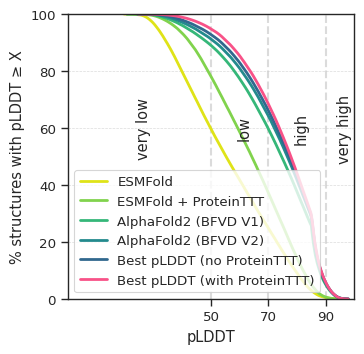

In [8]:
# Create plot
plt.figure(figsize=(3.7, 3.7))

# Calculate row-wise maximum
df['pLDDT_max'] = df[['pLDDT_AlphaFold', 'pLDDT_before', 'pLDDT_after']].max(axis=1)
df['pLDDT_max_no_ttt'] = df[['pLDDT_AlphaFold', 'pLDDT_before']].max(axis=1)

# Calculate all cumulative percentages first
cumulative_data = {}
for data_col, label in [
    (df['pLDDT_before'], 'ESMFold'),
    (df['pLDDT_after'], 'ESMFold + ProteinTTT'),
    # (df['base_plddt'], 'base_plddt'),
    (df['logan_plddt'], 'AlphaFold2 (BFVD V1)'),
    # (df['X12cycle_plddt'], 'X12cycle_plddt')
    (df['pLDDT_AlphaFold'], 'AlphaFold2 (BFVD V2)'),
    (df['pLDDT_max_no_ttt'], 'Best pLDDT (no ProteinTTT)'),
    (df['pLDDT_max'], 'Best pLDDT (with ProteinTTT)'),
]:
    # Sort pLDDT values in descending order
    plddt_sorted = data_col.sort_values(ascending=False)
    
    # Calculate cumulative percentage
    total_structures = len(plddt_sorted)
    cumulative_pct = [(len(plddt_sorted[plddt_sorted >= x]) / total_structures) * 100 
                      for x in plddt_sorted]
    
    cumulative_data[label] = (plddt_sorted, cumulative_pct)

# Plot from the stored data
# colors = sns.color_palette("magma_r", n_colors=len(cumulative_data) + 1)
for i, (label, (plddt_sorted, cumulative_pct)) in enumerate(cumulative_data.items()):
    plt.plot(
        plddt_sorted, cumulative_pct, linewidth=2, label=label,
        color=palette[int(i * len(palette) / (len(cumulative_data)))] if i < len(cumulative_data) - 1 else ttt_colors[0],
        alpha=1
    )

# Set grid with different line widths for vertical and horizontal
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().grid(True, which='major', axis='x', linewidth=1.5, alpha=0.7, linestyle='--')
plt.gca().grid(True, which='major', axis='y', linewidth=0.5, alpha=0.7, linestyle='--')

plt.xlabel('pLDDT')
plt.ylabel('% structures with pLDDT ≥ X')

# Set axis limits similar to reference figure
plt.xlim(0, 100)
plt.ylim(0, 100)

# Add vertical lines for confidence regions
# plt.axvspan(0, 50, alpha=0.1, color='red')
# plt.axvspan(50, 70, alpha=0.1, color='yellow')
# plt.axvspan(70, 90, alpha=0.1, color='lightblue')
# plt.axvspan(90, 100, alpha=0.1, color='blue')

plt.xticks([50, 70, 90])

# Add vertical text labels
plt.text(24, 60, 'very low', rotation=90, verticalalignment='center')   
plt.text(59, 60, 'low', rotation=90, verticalalignment='center')
plt.text(79, 60, 'high', rotation=90, verticalalignment='center')
plt.text(94, 60, 'very high', rotation=90, verticalalignment='center')

plt.legend(loc='lower left', bbox_to_anchor=(0, 0))
plt.savefig('out_figures/bfvd_cumulative_plddt.svg', bbox_inches='tight')
plt.show()

Number of ESMFold+ProteinTTT improvement of AlphaFold2

In [9]:
(df['pLDDT_after'] > df['pLDDT_AlphaFold']).sum() / len(df)

0.192864018723929

Number of ESMFold+ProteinTTT improvements of AlphaFold2 and ESMFold

In [10]:
((df['pLDDT_after'] > df['pLDDT_before']) & (df['pLDDT_after'] > df['pLDDT_AlphaFold'])).sum() / len(df)

0.1805795861357359

Number of ESMFold improvments over AlphaFold2

In [11]:
(df['pLDDT_before'] > df['pLDDT_AlphaFold']).sum() / len(df)

0.09712094424975305

## Protein-wise improvments

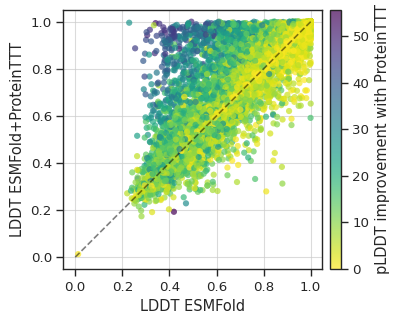

In [17]:
import matplotlib.pyplot as plt

df_plot = df_af2

# min_plddt_diff = 10
min_plddt_diff = -100
show_belt = False
color_by = "pLDDT_diff"

# Create figure with single plot and adjust size ratio to account for colorbar
fig = plt.figure(figsize=(3.7, 3.7))

# Calculate pLDDT difference
df['pLDDT_diff'] = df_plot['pLDDT_after'] - df_plot['pLDDT_before']

# Create main axis for scatter plot
ax = fig.add_axes([0.15, 0.15, 0.7, 0.7])

# Create scatter plot
scatter = ax.scatter(df['lddt_before'], df['lddt_after'], 
                    c=df['pLDDT_diff'],
                    cmap='viridis_r',#mpl.colors.LinearSegmentedColormap.from_list('custom', ['#FF5B83', '#1FFF00']),
                    alpha=0.7,
                    edgecolors='black',  # Add black edges to circles
                    linewidth=0.,
                    s=20)

# Make plot square
ax.set_aspect('equal')

# Add diagonal line
ax.plot([0, 1], [0, 1], '--', color='black', alpha=0.5, zorder=11)
ax.grid(True, linestyle='-', alpha=0.7)

ax.set_xlabel('LDDT ESMFold')
ax.set_ylabel('LDDT ESMFold+ProteinTTT')

# Add colorbar with same height as plot
cax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
plt.colorbar(scatter, cax=cax, label='pLDDT improvement with ProteinTTT')
plt.savefig('out_figures/bfvd_protein_wise_improvement.svg', bbox_inches='tight', format='svg')

# plt.grid(True, linestyle='-', alpha=0.7)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_xlabel('')
# ax.set_ylabel('')
# plt.savefig(f'out_figures/bfvd_protein_wise_improvement.png', bbox_inches='tight', dpi=300)

plt.show()

## Correlation between pLDDT and LDDT

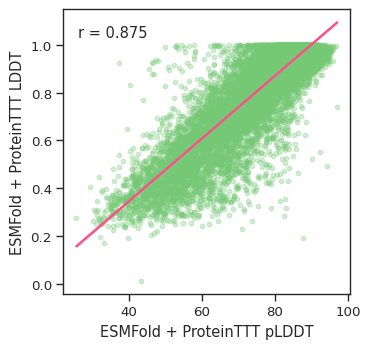

In [13]:
colors_anton = ['#F85288', '#75C975']
fig, ax = plt.subplots(figsize=(3.7, 3.7))
sns.regplot(
    data=df_af2, x='pLDDT_after', y='lddt_after',
    scatter_kws={'color': colors_anton[1], 'alpha': 0.3, 's': 10},
    line_kws={'color': colors_anton[0]}
)
pearson_corr = df_af2['pLDDT_after'].corr(df_af2['lddt_after'], method='pearson')
ax.text(0.05, 0.9, f'r = {pearson_corr:.3f}', transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.xlabel('ESMFold + ProteinTTT pLDDT')
plt.ylabel('ESMFold + ProteinTTT LDDT')
plt.savefig('out_figures/bfvd_plddt_lddt.pdf', bbox_inches='tight', format='pdf')
plt.show()

## Improvement against MSA size

/tmp/ipykernel_4114466/2903811914.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_plot.groupby('nmsa_bin')[f'{metric}_improvement'].mean()


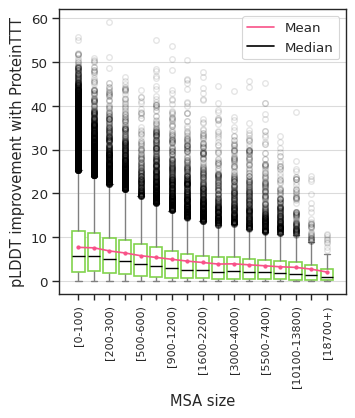

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x_max = df_plot['nmsa'].max()
n_bins = 20  # Number of logarithmic bins

df_plot = df

for metric in ['pLDDT']:#, 'tm_score', 'lddt']:
    # Create bins with first bin 0-100, then logarithmic
    bins = [0, 100]  # First bin 0-100
    # Generate remaining logarithmic bins from 100 to x_max
    remaining_bins = np.geomspace(100, x_max, n_bins-1)
    # Round bin edges to nearest hundred
    remaining_bins = np.array([round(x/100)*100 for x in remaining_bins])
    bins.extend(remaining_bins)
    bins = np.unique(bins)  # Remove any duplicate bin edges
    
    # Ensure bins are strictly increasing
    bins = np.sort(bins)
    
    # Create bin labels with exclusive upper bounds except for last bin
    labels = []
    for i in range(len(bins)-1):
        if i == len(bins)-2:
            labels.append(f'[{int(bins[i])}+)')  # Last bin includes upper bound
        else:
            labels.append(f'[{int(bins[i])}-{int(bins[i+1])})')
            
    # Bin the data using right=False to make bins left-inclusive, right-exclusive
    df_plot['nmsa_bin'] = pd.cut(df_plot['nmsa'],
                                bins=bins,
                                labels=labels,
                                include_lowest=True,
                                right=False)
    
    # Initialize plot
    plt.figure(figsize=(3.7, 3.7))
    
    # Create boxplot using seaborn
    ax = sns.boxplot(data=df_plot,
                    x='nmsa_bin',
                    y=f'{metric}_improvement',
                    color='white',
                    fliersize=4,
                    flierprops={'alpha': 0.1, 'markeredgecolor': 'black'},
                    boxprops=dict(edgecolor=palette[3], linewidth=1.2),
                    whiskerprops=dict(color='gray'),
                    capprops=dict(color='gray'),
                    medianprops=dict(color='black'))

    # Make boxes opaque
    for patch in ax.patches:
        patch.set_alpha(1.0)

    # Add mean line
    means = df_plot.groupby('nmsa_bin')[f'{metric}_improvement'].mean()
    ax.plot(range(len(means)), means, color=ttt_colors[0], zorder=10, label='Mean')
    ax.scatter(range(len(means)), means, color=ttt_colors[0], s=5, zorder=11)

    # Add black line to legend for median
    ax.plot([], [], color='black', label='Median')

    # Customize plot
    ax.set_xlabel('MSA size')
    ax.set_ylabel(f'{metric} improvement with ProteinTTT')
    ax.grid(axis='y', linestyle='-', alpha=0.7)

    # Set x ticks and labels with increased visibility, showing only every third label
    ax.set_xticks(range(len(means)))
    labels = [label if i % 2 == 0 else '' for i, label in enumerate(means.index)]
    ax.set_xticklabels(labels, rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=8, length=4, width=1)

    # ax.set_xticklabels([])
    # ax.set_yticklabels([])
    # plt.xlabel('')
    # plt.ylabel('')
    # plt.savefig(f'out_figures/bfvd_improvement_nmsa_{metric}.png', bbox_inches='tight', dpi=300)

    plt.legend()
    plt.savefig(f'out_figures/bfvd_improvement_nmsa_{metric}.svg', bbox_inches='tight', format='svg')
    plt.show()

## Improvement over AlphaFold2 and ESMFold

In [19]:
df_qual = df[(df['pLDDT_AlphaFold'] < 60) & (df['pLDDT_before'] < 60) & (df['pLDDT_after'] > 80)]
df_qual['ttt_improvement_over_af_lddt'] = df_qual['pLDDT_after'] - df_qual['pLDDT_AlphaFold']
df_qual.sort_values('ttt_improvement_over_af_lddt', ascending=False)
print(len(df_qual))
df_qual[:40]

105


/tmp/ipykernel_4114466/1152548958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qual['ttt_improvement_over_af_lddt'] = df_qual['pLDDT_after'] - df_qual['pLDDT_AlphaFold']


,id,nmsa,pLDDT_AlphaFold,version,sequence,length,pLDDT_before,pLDDT_after,tm_score_before,lddt_before,...,difference_plddt,pLDDT_improvement,tm_score_improvement,lddt_improvement,base_plddt,logan_plddt,X12cycle_plddt,pLDDT_diff,nmsa_bin,ttt_improvement_over_af_lddt
732,A0A1V0SB87,12,40.683406,BASE,MNIIIFMLLTLVFGYSYSTLILSIINFLHSNNKLYLLSSLLSINFI...,203,56.860940,80.336536,0.30885,0.755592,...,23.475596,23.475596,-0.03197,-0.003412,40.743,36.735,39.038,NaN,[0-100),39.653130
2945,A0A516M5T2,4,42.159245,BASE+LOGAN+12CY,MSDGPIQPVLFYNPPGVYPPAPVFVKNKFGDDRPILVIGNTKLETK...,185,59.176980,83.893857,0.40909,0.442831,...,24.716877,24.716877,-0.03701,-0.060269,34.862,36.284,41.812,NaN,[0-100),41.734612
3588,A0A7S6GHK8,41,49.138619,BASE,MKGRNTGTIIGLVCGFIVAGSTATMGITDMKEQLEETKDELGLYKG...,92,56.303543,81.874519,0.28764,0.685105,...,25.570976,25.570976,-0.04597,-0.015756,48.962,48.962,48.962,NaN,[0-100),32.735900
4142,Q573G4,34,49.376202,BASE,MGRKKMMEKEKIEEMIKEINEELDKLCLFPLEFVDGGWRYYVHANA...,104,40.821429,80.709199,0.44124,0.638750,...,39.887770,39.887770,-0.06640,-0.085133,49.072,49.072,49.072,NaN,[0-100),31.332997
4612,A0A8S5RYV6,18,49.567534,BASE+LOGAN,MAVIGNLNIILKNGEKVSCVYGNDAQLTNKEFVIFLKSLYFALDSE...,102,38.416032,80.360781,0.45225,0.447682,...,41.944750,41.944750,-0.01413,0.046371,43.388,49.574,48.257,NaN,[0-100),30.793248
4854,A0A5S9EQS7,3,49.672282,BASE,MKNLLVLNVVNVAEETNIANMLRLDVSYNNVNLGSVVLFDFSKDFD...,108,38.639082,80.428212,0.64622,0.633062,...,41.789129,41.789129,-0.16577,-0.081366,49.796,48.422,49.762,NaN,[0-100),30.755929
5174,S5WKC4,59,49.799786,BASE,MSTDAWILEKAAFACFSGVTEDSFKRLLFLHISKVVKENQNITTNR...,133,38.506530,82.225163,0.40461,0.461471,...,43.718633,43.718633,0.10251,0.097990,50.003,50.003,50.003,NaN,[0-100),32.425377
5204,Q4Z933,13,49.809485,BASE+LOGAN,MKFNETYAKYISDTFYKVKELYTSSESTRRTVNDINYKVSYIYDVS...,123,50.947687,81.201088,0.38529,0.483765,...,30.253401,30.253401,-0.09401,-0.008876,46.514,49.879,48.114,NaN,[0-100),31.391603
5282,A0A516MD59,5,49.839636,BASE+LOGAN+12CY,MRYSYDPGVVSIEVTTETELAEGERVIRHTTEPLMGFIVRDNRRAV...,70,50.461600,83.131673,0.41592,0.419074,...,32.670073,32.670073,-0.03261,-0.021416,42.804,49.436,50.192,NaN,[0-100),33.292036
5407,A0A411MR56,1538,49.897938,BASE,MPRSAVLLNEYRVTFWPRTIPRLLGVRARPMKVREFALADGTQLSL...,70,59.192270,80.909497,0.30670,0.414250,...,21.717227,21.717227,-0.01248,-0.020030,49.788,49.788,49.788,NaN,[1200-1600),31.011560


## Benchmarking against PDB structures

In [46]:
import shutil
import subprocess
import os
from Bio import PDB
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [47]:
df_pdb = pd.read_csv('/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/bfvd_pdb100_mapping_lddt_nmsa_tophit.tsv', sep='\t', header=None)
df_pdb.columns = ['id', 'pdb_id', 'evalue', 'pident', 'fident', 'bits', 'qcov', 'tcov', 'qtmscore', 'ttmscore', 'lddt', 'nmsa']
df_pdb

,id,pdb_id,evalue,pident,fident,bits,qcov,tcov,qtmscore,ttmscore,lddt,nmsa
0,A0A068EP60,6yf7_AA,1.325000e-17,100.0,1.0,705,0.983,1.000,0.9199,0.9353,0.8948,93
1,A0A097I2D0,7n8n_C,6.595000e-23,100.0,1.0,938,0.912,1.000,0.7732,0.8437,0.7594,1275
2,A0A0A0U955,6djy_D,0.000000e+00,100.0,1.0,5293,1.000,1.000,0.8231,0.8231,0.7502,409
3,A0A0A1IVS8,6yse_A,5.445000e-06,100.0,1.0,233,1.000,1.000,0.8681,0.8681,0.9211,16
4,A0A0X1KHD2,5bpe_A,3.322000e-33,100.0,1.0,1470,1.000,1.000,0.9933,0.9933,0.9711,2250
...,...,...,...,...,...,...,...,...,...,...,...,...
288,UPI002249A336,7xc3_A,9.812000e-23,100.0,1.0,826,0.984,1.000,0.9560,0.9707,0.9147,84
289,UPI002249A33C,8a55_A,4.499000e-20,100.0,1.0,747,1.000,1.000,0.8802,0.8802,0.8707,73
290,UPI0022AB4E73,8hda_B,9.241000e-16,100.0,1.0,573,0.939,0.989,0.9014,0.9481,0.9048,110
291,UPI002348EE55,7n0i_H,1.731000e-16,100.0,1.0,576,0.960,1.000,0.8764,0.9102,0.8562,339


In [48]:
pdbs_dir = '/scratch/project/open-26-5/ProteinTTT/data/bfvd/pdb'
predicted_dir = '/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/predicted_structures'

In [49]:
def download_pdb_chains(pdb_chain_list, output_dir):
    """
    Download PDB chains specified in list. Tries PDB format first, falls back to mmCIF if needed.
    
    Args:
        pdb_chain_list: List/Series of PDB chain IDs in format 'XXXX_Y'
        output_dir: Directory to save PDB files
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize PDB list downloader
    pdbl = PDB.PDBList()
    
    # Initialize parsers
    pdb_parser = PDB.PDBParser()
    cif_parser = PDB.MMCIFParser()
    
    # Initialize PDBIO for saving structures
    io = PDB.PDBIO()
    
    for pdb_chain in tqdm(pdb_chain_list):
        try:
            pdb_id = pdb_chain.split('_')[0].lower()
            chain_id = pdb_chain.split('_')[1]
            
            # Define output chain file path
            output_file = os.path.join(output_dir, f"{pdb_id}_{chain_id}.pdb")
            
            # Skip if chain file already exists
            if os.path.exists(output_file):
                continue
                
            # Try downloading PDB format first
            pdb_file = pdbl.retrieve_pdb_file(pdb_id, pdir=output_dir, file_format='pdb')
            
            if pdb_file and os.path.exists(pdb_file):
                # Parse PDB structure
                structure = pdb_parser.get_structure(pdb_id, pdb_file)
            else:
                # If PDB not found, try mmCIF format
                cif_file = pdbl.retrieve_pdb_file(pdb_id, pdir=output_dir, file_format='mmCif')
                if cif_file and os.path.exists(cif_file):
                    structure = cif_parser.get_structure(pdb_id, cif_file)
                else:
                    print(f"Could not download structure for {pdb_id}")
                    continue
                    
            # Select specific chain
            class ChainSelect(PDB.Select):
                def accept_chain(self, chain):
                    return chain.id == chain_id
            
            # Save only the specified chain in PDB format
            io.set_structure(structure)
            io.save(output_file, ChainSelect())
                
        except Exception as e:
            print(f"Error processing {pdb_chain}: {str(e)}")
            continue

# Download the PDB chains
# download_pdb_chains(df_pdb['pdb_id'], pdbs_dir)

In [50]:
pdb_downloaded = df_pdb['pdb_id'].apply(lambda x: os.path.exists(os.path.join(pdbs_dir, f"{x}.pdb")))
print(pdb_downloaded.value_counts())
df_pdb = df_pdb[pdb_downloaded]
df_pdb

pdb_id
True     279
False     14
Name: count, dtype: int64


,id,pdb_id,evalue,pident,fident,bits,qcov,tcov,qtmscore,ttmscore,lddt,nmsa
1,A0A097I2D0,7n8n_C,6.595000e-23,100.0,1.0,938,0.912,1.000,0.7732,0.8437,0.7594,1275
2,A0A0A0U955,6djy_D,0.000000e+00,100.0,1.0,5293,1.000,1.000,0.8231,0.8231,0.7502,409
3,A0A0A1IVS8,6yse_A,5.445000e-06,100.0,1.0,233,1.000,1.000,0.8681,0.8681,0.9211,16
4,A0A0X1KHD2,5bpe_A,3.322000e-33,100.0,1.0,1470,1.000,1.000,0.9933,0.9933,0.9711,2250
5,A0A140UHM9,5c2n_O,3.677000e-07,100.0,1.0,321,0.958,1.000,0.9229,0.9611,0.9485,488
...,...,...,...,...,...,...,...,...,...,...,...,...
288,UPI002249A336,7xc3_A,9.812000e-23,100.0,1.0,826,0.984,1.000,0.9560,0.9707,0.9147,84
289,UPI002249A33C,8a55_A,4.499000e-20,100.0,1.0,747,1.000,1.000,0.8802,0.8802,0.8707,73
290,UPI0022AB4E73,8hda_B,9.241000e-16,100.0,1.0,573,0.939,0.989,0.9014,0.9481,0.9048,110
291,UPI002348EE55,7n0i_H,1.731000e-16,100.0,1.0,576,0.960,1.000,0.8764,0.9102,0.8562,339


In [51]:
predicted_exists = df_pdb['id'].apply(lambda x: os.path.exists(os.path.join(predicted_dir, f"{x}.pdb")))
predicted_ttt_exists = df_pdb['id'].apply(lambda x: os.path.exists(os.path.join(predicted_dir, f"{x}_ttt.pdb")))
print(predicted_exists.value_counts())
print(predicted_ttt_exists.value_counts())
df_pdb = df_pdb[predicted_exists & predicted_ttt_exists]
df_pdb

id
True     253
False     26
Name: count, dtype: int64
id
False    147
True     132
Name: count, dtype: int64


,id,pdb_id,evalue,pident,fident,bits,qcov,tcov,qtmscore,ttmscore,lddt,nmsa
12,A0A1L4BKA3,6g42_B,5.665000e-55,100.0,1.0,2135,0.990,0.997,0.9342,0.9403,0.8763,66
15,A0A4Y5TPY8,6j3q_9,4.407000e-09,100.0,1.0,177,0.970,0.990,0.3472,0.3525,0.6146,35
17,A0A4Y5TR47,6l2w_B,2.837000e-19,100.0,1.0,680,0.991,0.966,0.9126,0.8903,0.8773,123
18,A0A7S6TBI0,6eh1_C,6.569000e-33,100.0,1.0,1202,0.911,0.911,0.8131,0.8131,0.8217,167
22,A5H7Q8,6ab6_C,2.750000e-52,100.0,1.0,1772,0.916,1.000,0.6373,0.6870,0.8349,2570
...,...,...,...,...,...,...,...,...,...,...,...,...
287,UPI002240E442,7u23_D,2.303000e-08,100.0,1.0,242,1.000,1.000,0.6910,0.6910,0.6917,2793
288,UPI002249A336,7xc3_A,9.812000e-23,100.0,1.0,826,0.984,1.000,0.9560,0.9707,0.9147,84
289,UPI002249A33C,8a55_A,4.499000e-20,100.0,1.0,747,1.000,1.000,0.8802,0.8802,0.8707,73
290,UPI0022AB4E73,8hda_B,9.241000e-16,100.0,1.0,573,0.939,0.989,0.9014,0.9481,0.9048,110


In [52]:
# Create base directory and subdirectories if they don't exist
base_dir = '/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/'
os.makedirs(base_dir, exist_ok=True)

for subdir in ['pdb', 'esmfold', 'esmfold_ttt']:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Move PDB files
for pdb_id in df_pdb['pdb_id']:
    src = os.path.join(pdbs_dir, f"{pdb_id}.pdb")
    dst = os.path.join(base_dir, 'pdb', f"{pdb_id}.pdb")
    if os.path.exists(src):
        shutil.copy2(src, dst)

# Move predicted structure files
for protein_id in df_pdb['id']:
    # Move ESMFold prediction
    src = os.path.join(predicted_dir, f"{protein_id}.pdb")
    dst = os.path.join(base_dir, 'esmfold', f"{protein_id}.pdb")
    if os.path.exists(src):
        shutil.copy2(src, dst)
        
    # Move ESMFold-TTT prediction
    src = os.path.join(predicted_dir, f"{protein_id}_ttt.pdb")
    dst = os.path.join(base_dir, 'esmfold_ttt', f"{protein_id}.pdb")
    if os.path.exists(src):
        shutil.copy2(src, dst)

In [53]:
# Run foldseek search from ESMFold predictions against PDB structures
for query_db in ['esmfold', 'esmfold_ttt']:
    foldseek_path = '/scratch/project/open-26-5/foldseek/bin/foldseek'
    esmfold_db = f'/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/{query_db}'
    pdb_db = '/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/pdb'
    out_file = f'/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/{query_db}_vs_pdb.m8'

    # Create foldseek databases
    subprocess.run([foldseek_path, 'createdb', esmfold_db, f'{esmfold_db}.db'])
    subprocess.run([foldseek_path, 'createdb', pdb_db, f'{pdb_db}.db'])

    # Run foldseek search
    subprocess.run([
        foldseek_path, 'easy-search',
        f'{esmfold_db}.db',
        f'{pdb_db}.db',
        out_file,
        'tmp',
        '--format-output', 'query,target,evalue,pident,fident,bits,qcov,tcov,qtmscore,ttmscore,lddt'
    ])

/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold.db exists and will be overwritten
createdb /scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold /scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold.db 

MMseqs Version:             	8979d230fb64c7089380b652758d8705493ed4a5
Use GPU                     	0
Path to ProstT5             	
Chain name mode             	0
Model name mode             	0
Createdb extraction mode    	0
Interface distance threshold	8
Write mapping file          	0
Mask b-factor threshold     	0
Coord store mode            	2
Write lookup file           	1
Input format                	0
File Inclusion Regex        	.*
File Exclusion Regex        	^$
Threads                     	64
Verbosity                   	3

Output file: /scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold.db
[=================================================================

] 132 0s 38ms
Time for merging to esmfold.db_ss: 0h 0m 0s 53ms
Time for merging to esmfold.db_h: 0h 0m 0s 52ms
Time for merging to esmfold.db_ca: 0h 0m 0s 53ms
Time for merging to esmfold.db: 0h 0m 0s 53ms
Ignore 0 out of 132.
Too short: 0, incorrect: 0, not proteins: 0.
Time for processing: 0h 0m 0s 608ms
/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/pdb.db exists and will be overwritten
createdb /scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/pdb /scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/pdb.db 

MMseqs Version:             	8979d230fb64c7089380b652758d8705493ed4a5
Use GPU                     	0
Path to ProstT5             	
Chain name mode             	0
Model name mode             	0
Createdb extraction mode    	0
Interface distance threshold	8
Write mapping file          	0
Mask b-factor threshold     	0
Coord store mode            	2
Write lookup file           	1
Input format                	0
File Inclusion Regex        	.*
File Ex

In [54]:
df_foldseek_esmfold = pd.read_csv(f'/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold_vs_pdb.m8', sep='\t', header=None)
df_foldseek_esmfold_ttt = pd.read_csv(f'/scratch/project/open-26-5/ProteinTTT/data/bfvd/foldseek_dbs/esmfold_ttt_vs_pdb.m8', sep='\t', header=None)
df_foldseek_esmfold_ttt.columns = ['query', 'target', 'evalue', 'pident', 'fident', 'bits', 'qcov', 'tcov', 'qtmscore', 'ttmscore', 'lddt']
df_foldseek_esmfold.columns = ['query', 'target', 'evalue', 'pident', 'fident', 'bits', 'qcov', 'tcov', 'qtmscore', 'ttmscore', 'lddt']

df_foldseek_esmfold['target'] = df_foldseek_esmfold['target'].apply(lambda x: '_'.join(x.split('_')[:2]))
df_foldseek_esmfold = df_foldseek_esmfold.groupby(['query', 'target'])['lddt'].mean()
df_foldseek_esmfold_ttt['target'] = df_foldseek_esmfold_ttt['target'].apply(lambda x: '_'.join(x.split('_')[:2]))
df_foldseek_esmfold_ttt = df_foldseek_esmfold_ttt.groupby(['query', 'target'])['lddt'].mean()

df_foldseek_esmfold

query          target
A0A1L4BKA3     1b35_A    0.228000
               1b35_B    0.221800
               1b35_C    0.204200
               1fr5_C    0.160500
               2l9j_A    0.213267
                           ...   
UPI002348EE55  6zyc_A    0.424000
               7dqg_A    0.383400
               7n0i_H    0.463100
               7t5h_A    0.346900
               7t7i_A    0.437500
Name: lddt, Length: 2706, dtype: float64

In [66]:
df_res = []
for i, row in df_pdb.iterrows():
    df_res.append({
        'id': row['id'],
        'pdb_id': row['pdb_id'],
        'esmfold_lddt': df_foldseek_esmfold.loc[row['id']].loc[row['pdb_id']] if row['id'] in df_foldseek_esmfold.index and row['pdb_id'] in df_foldseek_esmfold.loc[row['id']].index else None,
        'esmfold_ttt_lddt': df_foldseek_esmfold_ttt.loc[row['id']].loc[row['pdb_id']] if row['id'] in df_foldseek_esmfold_ttt.index and row['pdb_id'] in df_foldseek_esmfold_ttt.loc[row['id']].index else None,
        'alphafold_lddt': row['lddt']
    })
df_res = pd.DataFrame(df_res)
print(len(df_res))
df_res = df_res.dropna()
df_res

132


,id,pdb_id,esmfold_lddt,esmfold_ttt_lddt,alphafold_lddt
0,A0A1L4BKA3,6g42_B,0.6586,0.6634,0.8763
3,A0A7S6TBI0,6eh1_C,0.7273,0.7171,0.8217
4,A5H7Q8,6ab6_C,0.6889,0.7751,0.8349
5,A7XXR5,6o3h_H,0.3182,0.6359,0.7980
6,G5DEI1,7dqg_A,0.7130,0.6474,0.8623
...,...,...,...,...,...
123,UPI001F0CDE09,7thx_1,0.6696,0.6545,0.7742
124,UPI001FE2432C,7t5h_A,0.5252,0.5928,0.9148
125,UPI002016A710,7kyl_Z,0.3321,0.3784,0.8651
126,UPI00209BBA60,7t7i_A,0.3651,0.3452,0.8135


In [69]:
df_res[df_res['esmfold_ttt_lddt'] > df_res['alphafold_lddt']]

,id,pdb_id,esmfold_lddt,esmfold_ttt_lddt,alphafold_lddt
11,Q7Y3F3,4f88_G,0.367600,0.440600,0.4241
17,UPI0000111489,1ezj_A,0.812200,0.857400,0.7830
22,UPI0000112EFD,1wjf_B,0.593523,0.744455,0.6403
36,UPI0001881C55,4ztj_B,0.812900,0.772100,0.7688
50,UPI00024ED25D,2l9j_A,0.645505,0.707660,0.7028
54,UPI00034F234F,4hr1_B,0.727100,0.706800,0.6980
62,UPI0005B2EBD9,4tt1_B,0.768200,0.768200,0.6886
65,UPI000641889E,2n2j_B,0.686880,0.812150,0.6535
98,UPI00101E865E,6mpo_A,0.587572,0.566648,0.5383
111,UPI001B7F7958,7lv9_F,0.727500,0.727500,0.7212


In [83]:
df_res['ttt_improvement_lddt'] = df_res['esmfold_ttt_lddt'] - df_res['esmfold_lddt']
df_res.sort_values('ttt_improvement_lddt', ascending=False)[:20]

,id,pdb_id,esmfold_lddt,esmfold_ttt_lddt,alphafold_lddt,ttt_improvement_lddt
21,UPI0000112E3F,1tul_A,0.3405,0.6958,0.9104,0.3553
5,A7XXR5,6o3h_H,0.3182,0.6359,0.7980,0.3177
72,UPI0007F04AD2,5ize_A,0.4936,0.8084,0.8206,0.3148
40,UPI0001A5EF77,3djw_B,0.6711,0.9314,0.9321,0.2603
94,UPI000DCF63DB,5fml_B,0.5377,0.7307,0.8754,0.1930
30,UPI0001753FA3,2qud_A,0.3880,0.5506,0.5549,0.1626
37,UPI00018BF9BF,2vrs_C,0.5688,0.7046,0.8759,0.1358
116,UPI001C4DD980,6zx9_C,0.7251,0.8576,0.8786,0.1325
89,UPI000BACEC22,5y0w_A,0.3812,0.5006,0.8576,0.1194
83,UPI000A2BFC0C,5mv0_A,0.7015,0.8184,0.9124,0.1169


Text(0, 0.5, 'Count')

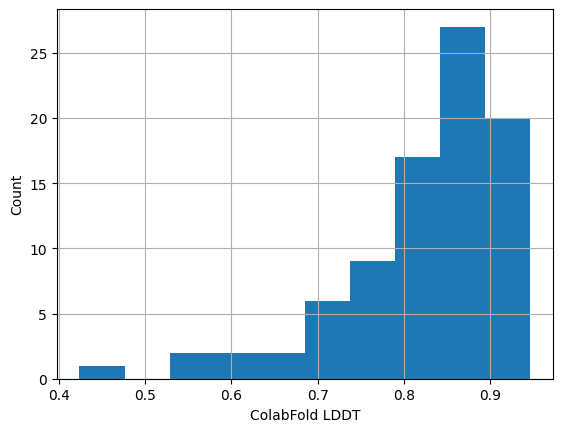

In [99]:
df_res['alphafold_lddt'].hist()
plt.xlabel('ColabFold LDDT')
plt.ylabel('Count')